# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 17, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

In [4]:
url = 'https://drive.google.com/file/d/19UYQaFKMTPshj8qrOIEI_yJhYJrNIRs-/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

raw = pd.read_csv(url)
df = raw.copy()

In [5]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
709,23352,2/10/2012,2/15/2012,Male,4,SAPPORO-SHI,HOKKAIDO,JP,79.0,3/31/2014,...,34963.0,102276,1/30/2014,62,15.046512,52,0,0.784301,52546,0
21024,23580,9/5/2011,9/5/2011,Female,4,shenzhen,guangdong,CN,29.0,3/31/2014,...,7596.0,17280,11/15/2013,138,32.666667,78,1,0.673144,9443,1
1547,35307,1/4/2012,1/19/2012,Male,4,wulumuqi,xinjiang,CN,42.0,3/31/2014,...,17891.0,87515,1/30/2014,62,14.239130,99,0,0.670796,52084,2
20957,41144,8/12/2011,8/12/2011,Male,4,nanjing,jiangsu,CN,38.0,3/31/2014,...,2775.0,19493,10/29/2013,155,47.250000,168,0,0.599149,6457,0
12137,4286,12/9/2009,12/9/2009,Female,4,wuhan,hubei,CN,35.0,3/31/2014,...,8474.0,22912,12/7/2013,116,31.736842,137,0,0.826891,21005,1


# 1. Exploratory Data Analysis

In [6]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

The _Airline Customer Value Analysis Case_ (df) dataset is a dataset that contains customer data for an airline. There are 62988 rows (customers) and 23 columns (customer attributes) consisting of 15 numerics and 8 categoricals. In some attributes there are an empty values.

Features description:
* BP_SUM: Itinerary (integer >0)
* SUM_YR_1: Fare revenue
* SUM_YR_2: Votes prices
* SEG_KM_SUM: The total distance (km) of flights that have been carried out
* LAST_TO_END: The distance between the last flight and the last booked flight
* AVG_INTERVAL: Average time gap
* MAX_INTERVAL: Maximum time interval
* EXCHANGE_COUNT: Exchange amount
* avg_discount: The average discount that the customer gets
* Points_Sum: The number of points earned by the customer
* Point_notFlight: Points that are not used by members
* FFP_TIER: Tier of the Frequent Flyer Program

**Feature category**

In [7]:
numericals   = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 
              'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
categoricals = ['GENDER', 'FFP_TIER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
date         = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [8]:
df = df.astype({'FFP_TIER': object})

# change the object type to datetime
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

In [9]:
# there is a datetime with a value that does not exist
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

**Statistics descriptive**

In [10]:
# statistics summary of numerical feature
df[numericals].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


There are some odd statistic summaries:
* max(AGE) = 110, there is a possibility of data input errors
* maximum value on some very large features (possible outliers)

In [11]:
# statistics summary of categorical feature
df[categoricals].describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,62988,60719,59740,62962
unique,2,3,3234,1165,118
top,Male,4,guangzhou,guangdong,CN
freq,48134,58066,9386,17509,57748


The majority of paseggers are:
* a man
* has an FFP TIER value of 4
* work in Guangzhou, China

### Handling missing values

In [12]:
# check the percentage of missing values ​​for each feature
round((df.isna().sum())/len(df), 6) * 100

MEMBER_NO            0.0000
FFP_DATE             0.0000
FIRST_FLIGHT_DATE    0.0000
GENDER               0.0048
FFP_TIER             0.0000
WORK_CITY            3.6023
WORK_PROVINCE        5.1565
WORK_COUNTRY         0.0413
AGE                  0.6668
LOAD_TIME            0.0000
FLIGHT_COUNT         0.0000
BP_SUM               0.0000
SUM_YR_1             0.8748
SUM_YR_2             0.2191
SEG_KM_SUM           0.0000
LAST_FLIGHT_DATE     0.0000
LAST_TO_END          0.0000
AVG_INTERVAL         0.0000
MAX_INTERVAL         0.0000
EXCHANGE_COUNT       0.0000
avg_discount         0.0000
Points_Sum           0.0000
Point_NotFlight      0.0000
dtype: float64

missing values percentage:
* WORK_PROVINCE (5.1565%)
* WORK_CITY (3.6023%)
* SUM_YR1 (0.8748%)
* LAST_FLIGHT_DATE (0.6684%)
* AGE (0.6668%)
* SUM_YR_2 (0.2191%)
* WORK_COUNTRY (0.0413%), GENDER (0.0048%)

In [13]:
df_filled = df.copy()

In [14]:
# imputation of the categorical column with the most frequently occurring value
df_filled['WORK_CITY'].fillna(df_filled['WORK_CITY'].mode()[0], inplace=True)
df_filled['WORK_PROVINCE'].fillna(df_filled['WORK_PROVINCE'].mode()[0], inplace=True)
df_filled['WORK_COUNTRY'].fillna(df_filled['WORK_COUNTRY'].mode()[0], inplace=True)
df_filled['GENDER'].fillna(df_filled['GENDER'].mode()[0], inplace=True)

In [15]:
# imputation of a numeric column with a median value
df_filled['AGE'].fillna(df_filled['AGE'].median(), inplace=True)
df_filled['SUM_YR_1'].fillna(df_filled['SUM_YR_1'].median(), inplace=True)
df_filled['SUM_YR_2'].fillna(df_filled['SUM_YR_2'].median(), inplace=True)

In [16]:
# check the percentage of missing values ​​for each feature
df_filled.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Handling duplicate values

In [17]:
# check the number of duplicated rows (all columns)
df_filled.duplicated().sum()

0

In [18]:
# check the number of duplicated rows (member id)
df_filled.duplicated(subset = ['MEMBER_NO']).sum()

0

There are no duplicate data.

### Distribution of feature numericals

In [19]:
# summary of feature numericals statistics from the df_filled dataset
df_filled[numericals].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


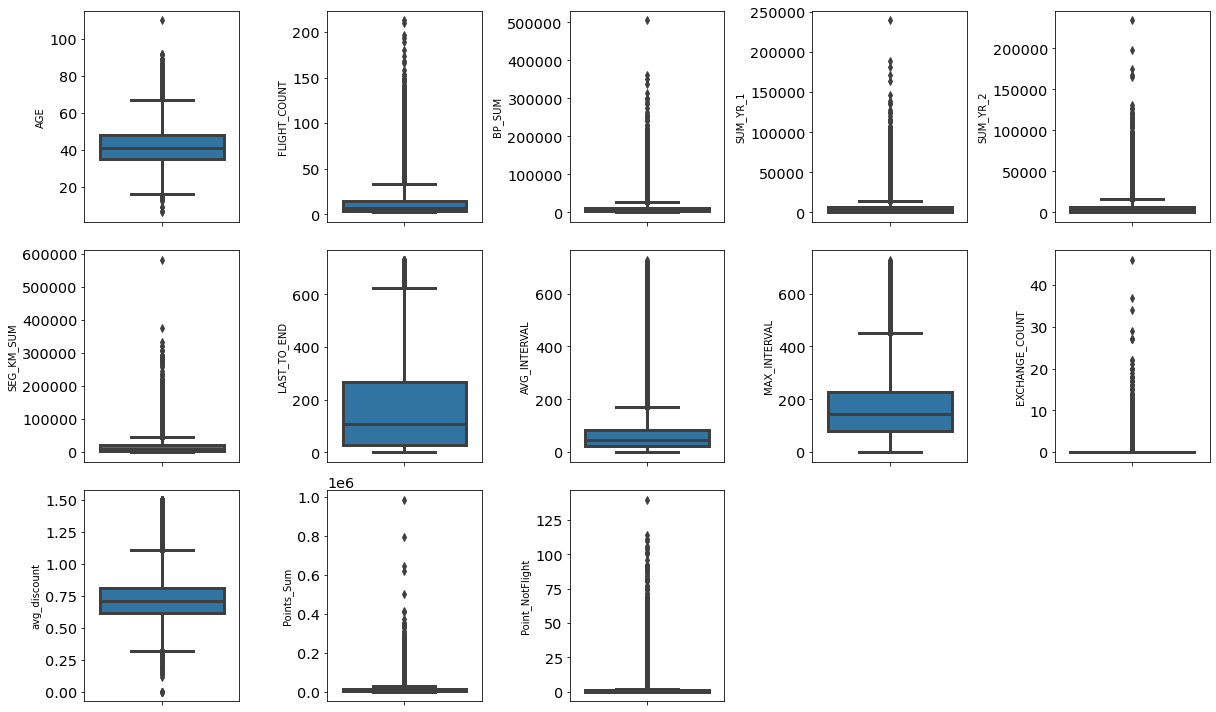

In [20]:
for i in range (0, len (numericals)):
    plt.subplot (3, 5, i+1)
    sns.boxplot (y = df_filled[numericals[i]])
    plt.tight_layout()

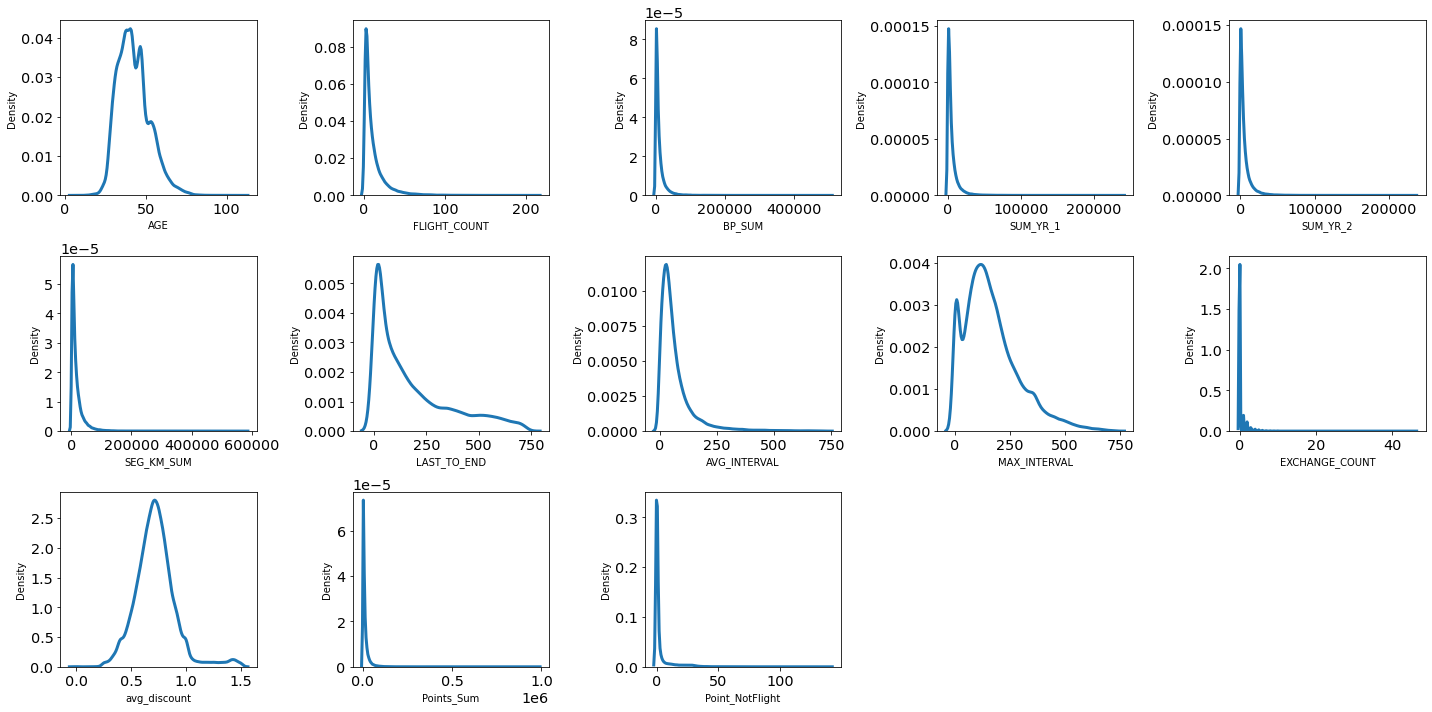

In [21]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numericals)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(df_filled[numericals[i]])
    plt.tight_layout()

* Each numeric feature has a positive skew distribution (mean > median). However, in the AGE feature and avg_discount the difference is not significant enough so that the shape of the distribution tends to be normal
* Every feature tends to have outliers, especially features FLIGHT_COUNT, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, Points_Sum, and Point_NotFlight

### Distribution of feature categoricals

In [22]:
df_filled[categoricals].describe()

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62988,62988,62988,62988,62988
unique,2,3,3234,1165,118
top,Male,4,guangzhou,guangdong,CN
freq,48137,58066,11655,20757,57774


In [23]:
# frequency of unique values ​​for feature categoricals
for col in categoricals:
    print(f'''value count kolom {col}:''')
    print(df_filled[col].value_counts(normalize = True))
    print()

value count kolom GENDER:
Male      0.764225
Female    0.235775
Name: GENDER, dtype: float64

value count kolom FFP_TIER:
4    0.921858
5    0.054121
6    0.024020
Name: FFP_TIER, dtype: float64

value count kolom WORK_CITY:
guangzhou    0.185035
beijing      0.124548
shanghai     0.079396
shenzhen     0.057233
dalian       0.031419
               ...   
KASUGAI      0.000016
hainan       0.000016
xinxishi     0.000016
KA           0.000016
lingshui     0.000016
Name: WORK_CITY, Length: 3234, dtype: float64

value count kolom WORK_PROVINCE:
guangdong        0.329539
beijing          0.127231
shanghai         0.079348
liaoning         0.066394
xinjiang         0.039881
                   ...   
YAMAGUCHI-KEN    0.000016
AICHIKEN         0.000016
SOUTU HOLLAND    0.000016
xinxixian        0.000016
JAWATIMUR        0.000016
Name: WORK_PROVINCE, Length: 1165, dtype: float64

value count kolom WORK_COUNTRY:
CN    0.917222
HK    0.015733
JP    0.013892
KR    0.012542
US    0.009129
        .

* 76% of customers are men
* 92% comes from FFP_TIER = 4
* 92% of customers work in China (WORK_COUNTRY = CN)
* Too many unique values ​​for the WORK_CITY and WORK_PROVINCE features with fairly even distribution of data other than dominant values ​​(data can be deleted)

## Feature Correlation

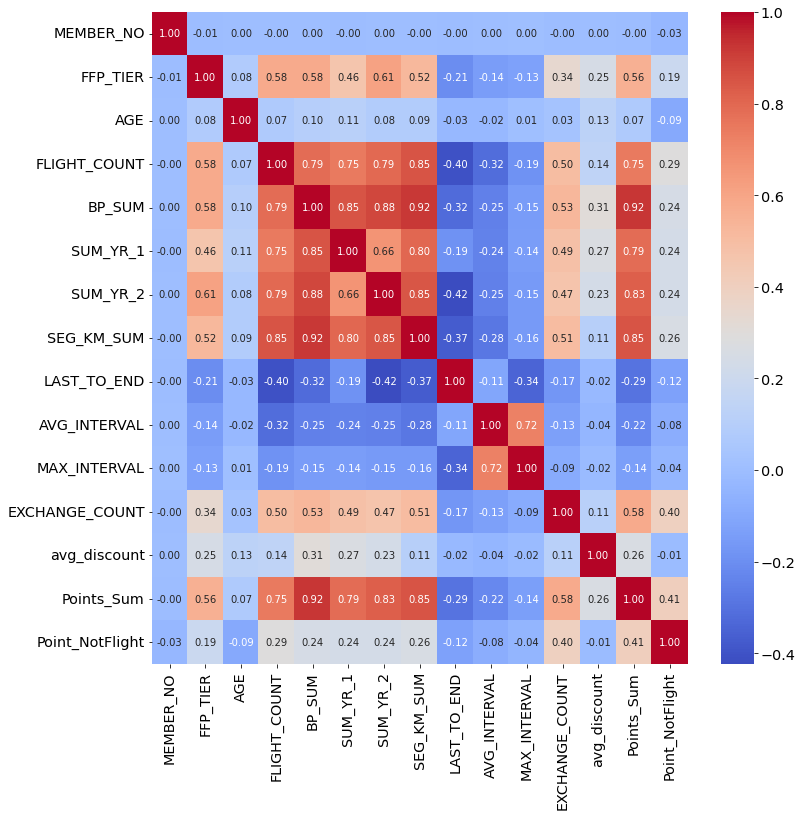

In [24]:
df_filled = df_filled.astype({'FFP_TIER': int})

plt.figure(figsize = (12, 12))
sns.heatmap(df_filled.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

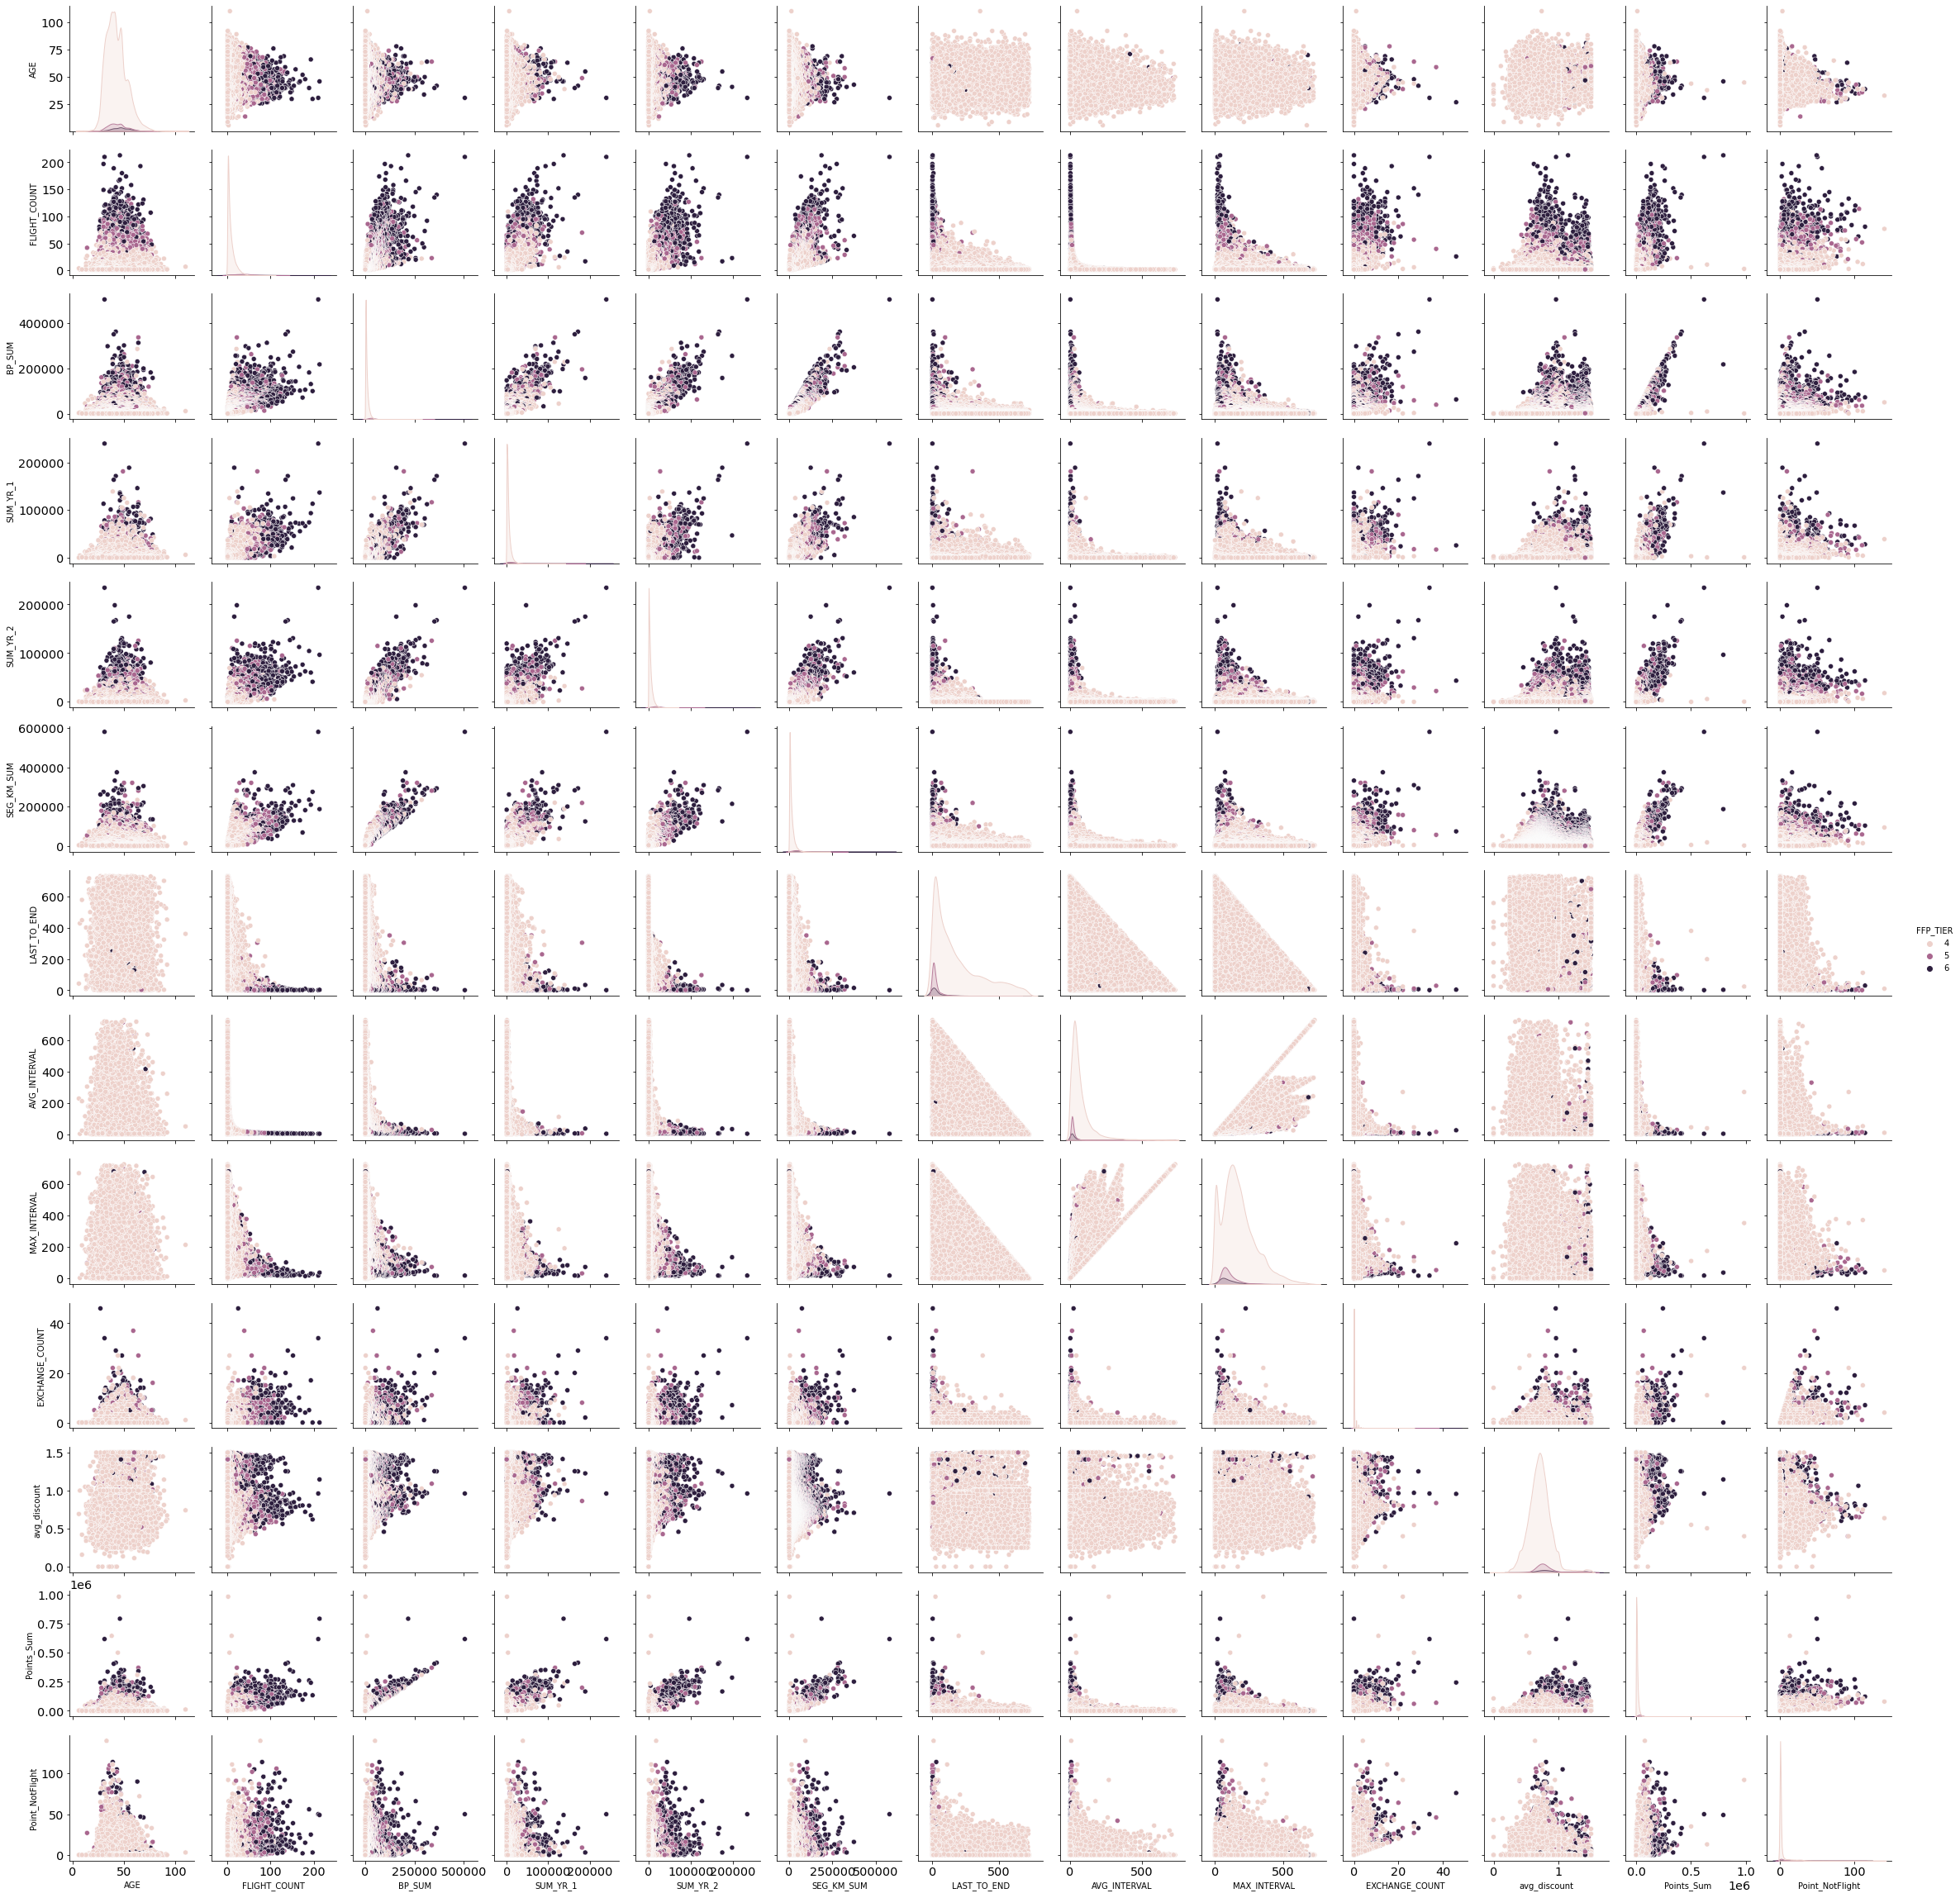

In [ ]:
num = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'FFP_TIER',
       'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
sns.pairplot(df_filled[num], kind = 'scatter', diag_kind = 'kde', hue = 'FFP_TIER')

* Drop features that correlate > 0.7, namely FLIGHT_COUNT, BP_SUM, SUM_YR_2, SEG_KM_SUM, Points_Sum, and MAX_INTERVAL.
* FFP_TIER correlates quite closely with FLIGHT_COUNT, BP_SUM, SUM_YR_2, and Points_Sum

# 2. Data Pre-Processing dan Feature Engineering

## Feature selection

In [25]:
df_selected = df_filled.copy()

In [26]:
# drop redundan feature 
df_selected = df_selected.drop(['BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'Points_Sum', 'MAX_INTERVAL'], axis = 1)

In [27]:
# drop features that are less relevant for clustering
df_selected = df_selected.drop(['MEMBER_NO', 'GENDER', 'FFP_DATE','WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME'], axis = 1)

In [28]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 1   FFP_TIER           62988 non-null  int64         
 2   AGE                62988 non-null  float64       
 3   FLIGHT_COUNT       62988 non-null  int64         
 4   SEG_KM_SUM         62988 non-null  int64         
 5   LAST_FLIGHT_DATE   62988 non-null  datetime64[ns]
 6   LAST_TO_END        62988 non-null  int64         
 7   AVG_INTERVAL       62988 non-null  float64       
 8   EXCHANGE_COUNT     62988 non-null  int64         
 9   avg_discount       62988 non-null  float64       
 10  Point_NotFlight    62988 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6)
memory usage: 5.3 MB


## Feature Transformation

In [29]:
df_transformed = df_selected.copy()

In [30]:
# average distance between customer flights
df_transformed['AVG_FLIGHT_TIME'] = (df_transformed['LAST_FLIGHT_DATE'] - df_transformed['FIRST_FLIGHT_DATE'])/df_transformed['FLIGHT_COUNT']
df_transformed['AVG_FLIGHT_TIME'] = df_transformed['AVG_FLIGHT_TIME'].dt.days

In [31]:
# contains a row with FIRST_FLIGHT_DATE < LAST_FLIGHT_DATE, drop
df_transformed = df_transformed[df_transformed.AVG_FLIGHT_TIME > 0]

In [32]:
# drop original feature
df_transformed = df_transformed.drop(['FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'FLIGHT_COUNT'], axis = 1)

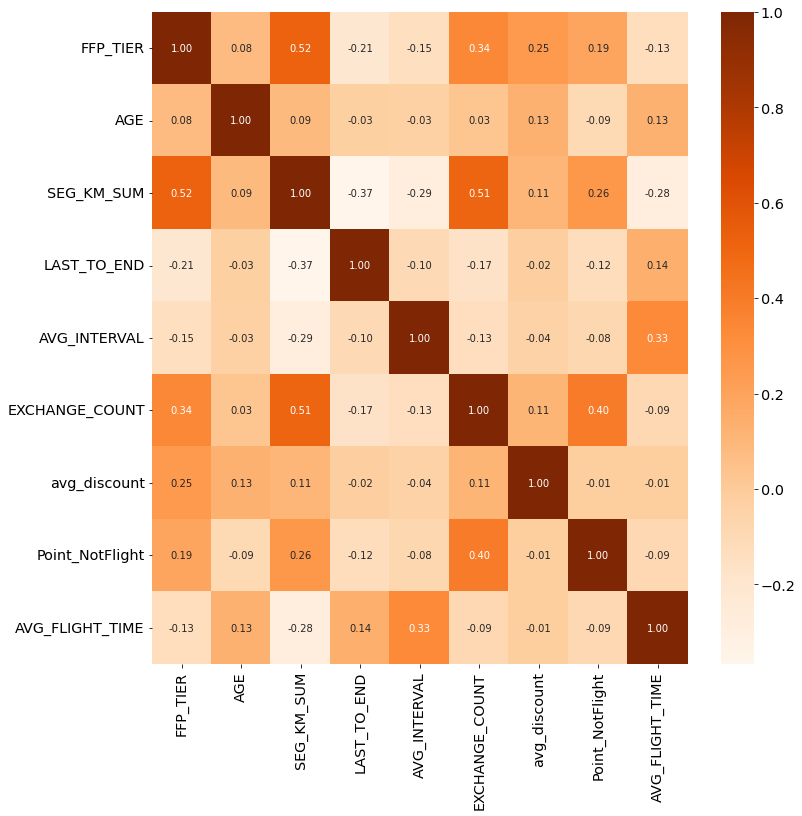

In [33]:
# check the correlation between features
plt.figure(figsize=(12, 12))
sns.heatmap(df_transformed.corr(), cmap='Oranges', annot=True, fmt='.2f')

There are no redundant features. Features that can be dropped because the correlation with all other features is very small: LAST_TO_END, AVG_INTERVAL

In [34]:
# drop feature
df_transformed = df_transformed.drop(['LAST_TO_END', 'AVG_INTERVAL'], axis = 1)

In [35]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62403 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         62403 non-null  int64  
 1   AGE              62403 non-null  float64
 2   SEG_KM_SUM       62403 non-null  int64  
 3   EXCHANGE_COUNT   62403 non-null  int64  
 4   avg_discount     62403 non-null  float64
 5   Point_NotFlight  62403 non-null  int64  
 6   AVG_FLIGHT_TIME  62403 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 3.8 MB


## Handling Outliers

In [36]:
df_cleaned = df_transformed.copy()

In [37]:
nums = ['FFP_TIER', 'AGE', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'avg_discount', 'Point_NotFlight', 'AVG_FLIGHT_TIME']

In [38]:
# IQR function 
def IQR(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  
  bb = q1 - 1.5*(q3 - q1)
  ba = q3 + 1.5*(q3 - q1)

  outlier_indices = list(x.index[(x < bb) | (x > ba)])
  outlier_values = list(x[outlier_indices])

  return len(outlier_indices)

# IQR Method
for i in nums:
  print(f'Jumlah outlier IQR {i}: {IQR(df_cleaned[i])}')

Jumlah outlier IQR FFP_TIER: 4912
Jumlah outlier IQR AGE: 992
Jumlah outlier IQR SEG_KM_SUM: 4745
Jumlah outlier IQR EXCHANGE_COUNT: 8727
Jumlah outlier IQR avg_discount: 2565
Jumlah outlier IQR Point_NotFlight: 11221
Jumlah outlier IQR AVG_FLIGHT_TIME: 5797


In [42]:
# library: 
from scipy import stats

z_score = df_cleaned.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(z_score)}')

filtered_entries = np.array([True] * len(z_score))  
for col in nums:
    zscore = abs(stats.zscore(df_cleaned[col])) 
    filtered_entries = (zscore < 4) & filtered_entries 
    
z_score = z_score[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(z_score)}')
print(f'Persentase drop data outliers: {round(((len(df_cleaned)-len(z_score))/len(df_cleaned))*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 62403
Jumlah baris setelah memfilter outlier: 58633
Persentase drop data outliers: 6.04%


In [43]:
z_score.describe()

,FFP_TIER,AGE,SEG_KM_SUM,EXCHANGE_COUNT,avg_discount,Point_NotFlight,AVG_FLIGHT_TIME
count,58633.000000,58633.000000,58633.000000,58633.000000,58633.000000,58633.000000,58633.000000
mean,4.048403,42.262310,15228.747327,0.198438,0.712388,2.113110,173.369724
std,0.214618,9.790849,15325.681735,0.626159,0.171817,5.664913,202.487783
min,4.000000,6.000000,368.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,35.000000,4823.000000,0.000000,0.608465,0.000000,44.000000
50%,4.000000,41.000000,9802.000000,0.000000,0.707730,0.000000,95.000000
75%,4.000000,48.000000,20016.000000,0.000000,0.802288,1.000000,220.000000
max,5.000000,81.000000,101114.000000,4.000000,1.460736,32.000000,1120.000000


# 3. Clustering K-means

## Standardization

In [44]:
data = z_score.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58633 entries, 156 to 62987
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         58633 non-null  int64  
 1   AGE              58633 non-null  float64
 2   SEG_KM_SUM       58633 non-null  int64  
 3   EXCHANGE_COUNT   58633 non-null  int64  
 4   avg_discount     58633 non-null  float64
 5   Point_NotFlight  58633 non-null  int64  
 6   AVG_FLIGHT_TIME  58633 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 3.6 MB


Features description:
* SEG_KM_SUM: The total distance (km) of flights that have been carried out
* EXCHANGE_COUNT: Exchange amount
* avg_discount: The average discount that the customer gets
* Point_notFlight: Points that are not used by members
* FFP_TIER: Tier of the Frequent Flyer Program

In [66]:
feature = ['SEG_KM_SUM', 'avg_discount', 'AVG_FLIGHT_TIME']
X = data[feature]

In [67]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

df_std = pd.DataFrame(X_std, columns = feature)

## K means clustering

In [68]:
from sklearn.cluster import KMeans

In [69]:
# elbow method
inertia = []

max = 11
for i in range(1, max):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(X_std)
  inertia.append(kmeans.inertia_)

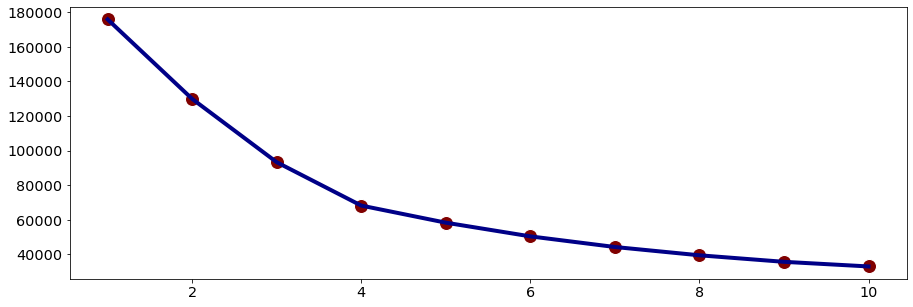

In [70]:
# elbow plot
rcParams['figure.figsize'] = 15, 5
sns.lineplot(x = range(1, max), y = inertia, color = '#000087', linewidth = 4)
sns.scatterplot(x = range(1, max), y = inertia, s = 200, color = '#800000')

In [71]:
# reduction of inertia per cluster
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    46009.463950
1    36624.399931
2    25090.011918
3     9893.631100
4     7922.422701
5     6147.310086
6     4796.710571
7     3779.264172
8     2672.872231
9             NaN
dtype: float64

Based on the elbow method, the optimal number of clusters is 4.

In [72]:
# number of clusters selected
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_std)

df_std['km_labels'] = kmeans.labels_ 

## PCA

In [73]:
## do PCA to see the cluster visualization
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)

pca.fit(df_std)
pcs = pca.transform(df_std)
df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])

In [74]:
df_pca['km_labels'] = df_std['km_labels']
df_pca.head()

,PC 1,PC 2,km_labels
0,5.707049,-0.305231,3
1,5.691060,-0.398004,3
2,5.564909,-0.098103,3
3,5.465753,-0.399012,3
4,5.275521,-0.642052,3


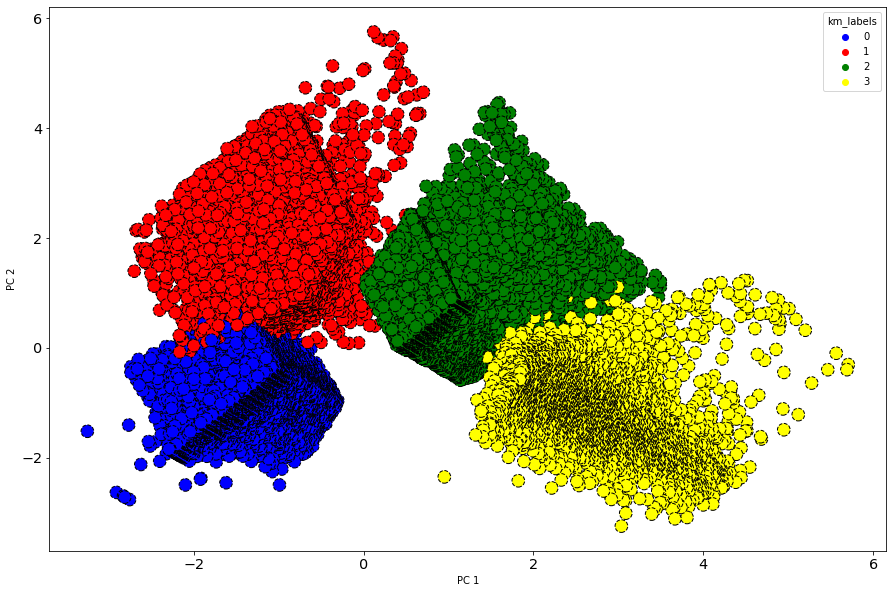

In [75]:
# visualisasi
fig, ax = plt.subplots(figsize = (15, 10))

sns.scatterplot(x = 'PC 1', y = 'PC 2', hue = 'km_labels', edgecolor = 'black', linestyle = '--',
                data = df_pca, palette = ['blue','red','green','yellow'], s = 160, ax = ax)

In [76]:
df_final = data[feature].copy()
df_final['labels'] = kmeans.labels_

df_final.sample(5)

,SEG_KM_SUM,avg_discount,AVG_FLIGHT_TIME,labels
12049,31309,0.608210,26,3
8921,34703,0.684732,100,3
59429,2710,0.500000,2,0
59272,1380,1.000000,362,2
32191,19046,0.354204,124,0


In [77]:
df_final.groupby(['labels']).agg(['mean'])

,SEG_KM_SUM,avg_discount,AVG_FLIGHT_TIME
,mean,mean,mean
labels,,,
0,11114.475859,0.594246,117.954407
1,5144.649735,0.695255,631.160425
2,10746.896634,0.867222,125.884812
3,45842.775021,0.725749,60.866595
